Reference : https://platform.openai.com/docs/guides/fine-tuning

In [1]:
# Install openai module
!pip install openai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 31.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 16.3 MB/s eta 0:00:00


In [2]:
# Import json module for reading the api keys
import json
import openai

In [4]:
# Define the name of the json file
# format of the openai_api_key json file
# API keys can be fetched here : https://help.openai.com/en/articles/4936850-where-do-i-find-my-secret-api-key
# https://platform.openai.com/account/api-keys

# {
#	 "API_KEY" : "sk-******************************5"
# }



json_file = "openai_api_key.json"

# Open the json file and load its contents
with open(json_file) as f:
    data = json.load(f)

openai.api_key = data['API_KEY']

In [5]:
# Train the open ai curies model using the train data jsonl file prepared.
# Prompt format is below :

# {"prompt":"Rate this review on a scale from 1 to 5. Output only the integer rating : Although I reported that had pre clearance, I was required to go through anyway","completion":"2"}



## Prompt format 

{"prompt": "<question>", "completion": "<ideal answer>"}

{"prompt": "<question>", "completion": "<ideal answer>"}

{"prompt": "<question>", "completion": "<ideal answer>"}

Example Prompt :
{"prompt":"Rate this review on a scale from 1 to 5. Output only the integer rating : Although I reported that had pre clearance, I was required to go through anyway","completion":"2"}


We can check the training data using a CLI data preparation tool provided by OpenAI. It gives you suggestions about how you can reformat the training data.

Run this line of code in the notebook to use the CLI data preparatin tool :

!openai tools fine_tunes.prepare_data -f training_data.jsonl


In [8]:
# Uploading Training Data

file_name = 'jsonl_file_prepared_train.jsonl'
upload_response = openai.File.create(
  file=open(file_name, "rb"),
   purpose='fine-tune'
 )
file_id = upload_response.id
upload_response

<File file id=file-dFIzd5kvjn24ZBxs9fWYWzGl at 0x7f9df51b3ce0> JSON: {
  "bytes": 3592612,
  "created_at": 1684861917,
  "filename": "file",
  "id": "file-dFIzd5kvjn24ZBxs9fWYWzGl",
  "object": "file",
  "purpose": "fine-tune",
  "status": "uploaded",
  "status_details": null
}

The upload response shows the file id

Here the file id is  "file-dFIzd5kvjn24ZBxs9fWYWzGl"

In [9]:
# Fine tuning the curie model : by default openai takes curie model 
# Note that executing this step will incur cost

fine_tune_response = openai.FineTune.create(training_file=file_id)
fine_tune_response

<FineTune fine-tune id=ft-Y5Nq4SVZt0GhWGEnUNs7jDii at 0x7f9de41cb8d0> JSON: {
  "created_at": 1684861976,
  "events": [
    {
      "created_at": 1684861976,
      "level": "info",
      "message": "Created fine-tune: ft-Y5Nq4SVZt0GhWGEnUNs7jDii",
      "object": "fine-tune-event"
    }
  ],
  "fine_tuned_model": null,
  "hyperparams": {
    "batch_size": null,
    "learning_rate_multiplier": null,
    "n_epochs": 4,
    "prompt_loss_weight": 0.01
  },
  "id": "ft-Y5Nq4SVZt0GhWGEnUNs7jDii",
  "model": "curie",
  "object": "fine-tune",
  "organization_id": "org-1KAQMHakVgEBRQ0r4xJytidH",
  "result_files": [],
  "status": "pending",
  "training_files": [
    {
      "bytes": 3592612,
      "created_at": 1684861917,
      "filename": "file",
      "id": "file-dFIzd5kvjn24ZBxs9fWYWzGl",
      "object": "file",
      "purpose": "fine-tune",
      "status": "processed",
      "status_details": null
    }
  ],
  "updated_at": 1684861976,
  "validation_files": []
}

The first execution of fine_tune_response will return with a status of "pending".
If we periodically execute fine_tune_response.events we can observe the queue number. Once we are first in line the fine tuning job would start.


## Troubleshooting fine_tuned_model as null
During the fine-tuning process, the fine_tuned_model key may not be immediately available in the fine_tune_response object returned by openai.FineTune.create().

To check the status of your fine-tuning process, you can call the openai.FineTune.retrieve() function and pass in the fine_tune_response.id. This function will return a JSON object with information about the training status, such as the current epoch, the current batch, the training loss, and the validation loss.

After the fine-tuning process is complete, you can check the status of all your fine-tuned models by calling openai.FineTune.list(). This will list all of your fine-tunes and their current status.

Once the fine-tuning process is complete, you can retrieve the fine_tuned_model key by calling the openai.FineTune.retrieve() function again and passing in the fine_tune_response.id. This will return a JSON object with the key fine_tuned_model and the ID of the fine-tuned model that you can use for further completions.

In [10]:
# For fine tuning Davinci , provide model = "davinci"
response_davinci = openai.FineTune.create(training_file=file_id, model="davinci")
response_davinci

<FineTune fine-tune id=ft-WtkwbBzJsntoDISEzzcnltAc at 0x7f9dc35739c0> JSON: {
  "created_at": 1684861993,
  "events": [
    {
      "created_at": 1684861993,
      "level": "info",
      "message": "Created fine-tune: ft-WtkwbBzJsntoDISEzzcnltAc",
      "object": "fine-tune-event"
    }
  ],
  "fine_tuned_model": null,
  "hyperparams": {
    "batch_size": null,
    "learning_rate_multiplier": null,
    "n_epochs": 4,
    "prompt_loss_weight": 0.01
  },
  "id": "ft-WtkwbBzJsntoDISEzzcnltAc",
  "model": "davinci",
  "object": "fine-tune",
  "organization_id": "org-1KAQMHakVgEBRQ0r4xJytidH",
  "result_files": [],
  "status": "pending",
  "training_files": [
    {
      "bytes": 3592612,
      "created_at": 1684861917,
      "filename": "file",
      "id": "file-dFIzd5kvjn24ZBxs9fWYWzGl",
      "object": "file",
      "purpose": "fine-tune",
      "status": "processed",
      "status_details": null
    }
  ],
  "updated_at": 1684861993,
  "validation_files": []
}

In [11]:
response_davinci.events

[<OpenAIObject fine-tune-event at 0x7f9dc35b0180> JSON: {
   "created_at": 1684861993,
   "level": "info",
   "message": "Created fine-tune: ft-WtkwbBzJsntoDISEzzcnltAc",
   "object": "fine-tune-event"
 }]

We can also retrive events by running the command : response = openai.FineTune.list_events(id=fine_tune_response.id)


In [12]:
openai.FineTune.list()

<OpenAIObject list at 0x7f9dc2a8d940> JSON: {
  "data": [
    {
      "created_at": 1683570234,
      "fine_tuned_model": "curie:ft-aravindsp-2023-05-08-18-27-01",
      "hyperparams": {
        "batch_size": 1,
        "learning_rate_multiplier": 0.1,
        "n_epochs": 4,
        "prompt_loss_weight": 0.01
      },
      "id": "ft-w3QBlDMniBafTCSup6v7SmL8",
      "model": "curie",
      "object": "fine-tune",
      "organization_id": "org-1KAQMHakVgEBRQ0r4xJytidH",
      "result_files": [
        {
          "bytes": 576,
          "created_at": 1683570423,
          "filename": "compiled_results.csv",
          "id": "file-ZOYtXeKd5LDBPkUoFYGs9e5A",
          "object": "file",
          "purpose": "fine-tune-results",
          "status": "processed",
          "status_details": null
        }
      ],
      "status": "succeeded",
      "training_files": [
        {
          "bytes": 678,
          "created_at": 1683569804,
          "filename": "file",
          "id": "file-pXoGRL

In [35]:
openai.FineTune.retrieve(id="ft-w3QBlDMniBafTCSup6v7SmL8")

<FineTune fine-tune id=ft-w3QBlDMniBafTCSup6v7SmL8 at 0x7f9dc358a3e0> JSON: {
  "created_at": 1683570234,
  "events": [
    {
      "created_at": 1683570234,
      "level": "info",
      "message": "Created fine-tune: ft-w3QBlDMniBafTCSup6v7SmL8",
      "object": "fine-tune-event"
    },
    {
      "created_at": 1683570339,
      "level": "info",
      "message": "Fine-tune costs $0.00",
      "object": "fine-tune-event"
    },
    {
      "created_at": 1683570339,
      "level": "info",
      "message": "Fine-tune enqueued. Queue number: 0",
      "object": "fine-tune-event"
    },
    {
      "created_at": 1683570340,
      "level": "info",
      "message": "Fine-tune started",
      "object": "fine-tune-event"
    },
    {
      "created_at": 1683570404,
      "level": "info",
      "message": "Completed epoch 1/4",
      "object": "fine-tune-event"
    },
    {
      "created_at": 1683570405,
      "level": "info",
      "message": "Completed epoch 2/4",
      "object": "fine-tune

Once the fine-tuning is finished, the status would show "succeeded" as illustrated above, we can go ahead and save the name of the fine-tuned model:

# Option 1 | if response.fine_tuned_model != null

fine_tuned_model = response.fine_tuned_model

fine_tuned_model

# Option 2 | if response.fine_tuned_model == null

retrieve_response = openai.FineTune.retrieve(response.id)

fine_tuned_model = retrieve_response.fine_tuned_model

fine_tuned_model

## Fine tuned Curie model

In [37]:
retrieve_response = openai.FineTune.retrieve('ft-w3QBlDMniBafTCSup6v7SmL8') # Once training is completed, use  : fine_tune_response.id instead of the direct model id.
fine_tuned_model_curie = retrieve_response.fine_tuned_model
fine_tuned_model_curie

'curie:ft-aravindsp-2023-05-08-18-27-01'

Testing the finee tuned model on a new prompt

In [38]:
new_prompt = "Classify the review : use a 5 point likert scale 1 being the most negative and  5 being the most positive. Only integer outputs : The tsa pre check and clear lines are getting the worse and worse. I spend minimum 30 minutes in priority lanes! The wait goes time every time I travel.comment sentiment ratings:"

In [41]:
answer = openai.Completion.create(
  model=fine_tuned_model_curie,
  prompt=new_prompt,
  max_tokens=1,
  temperature=0
)
answer['choices'][0]['text']

'1'

In [59]:
retrieve_response = openai.FineTune.retrieve('ft-7oeAH8xTaR1Pzg4bxGGfoKdT') # Once training is completed, use  : fine_tune_response.id instead of the direct model id.
fine_tuned_model_davinci = retrieve_response.fine_tuned_model
fine_tuned_model_davinci

'davinci:ft-aravindsp-2023-05-08-18-27-54'

In [60]:
fine_tuned_model_davinci

'davinci:ft-aravindsp-2023-05-08-18-27-54'

In [61]:
answer = openai.Completion.create(
  model=fine_tuned_model_curie,
  prompt=new_prompt,
  max_tokens=1,
  temperature=0
)
answer['choices'][0]['text']

'4'

In [49]:
# Import libraries
import json
import openai
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report




## Model Testing


## Curie

In [50]:
# Load the prompt and completions files
prompt = []
with open("prompts.txt", "r") as f:
    for line in f:
        prompt.append(line.strip())

completions = []
with open("completions.txt", "r") as f:
    for line in f:
        completions.append(line.strip())

In [51]:
# Initialize an empty list to store the sentiments
sentiments = []

# Loop through the prompt arguments and call the OpenAI model
for arg in prompt:
    # Call the OpenAI model and get the response
    response = openai.Completion.create(
        engine="curie:ft-aravindsp-2023-05-10-21-37-22",
        prompt=arg,
        temperature=0,
        max_tokens=1,
        top_p=1,
        frequency_penalty=0,
        presence_penalty=0,
        stop=["\n"]
    )
    # Extract the sentiment from the response
    sentiment = response["choices"][0]["text"]
    # Append the sentiment to the list
    sentiments.append(sentiment)

sentiments = np.delete(sentiments, -1)

In [55]:
# This section to be replaced with a ML model soon.

# Define a function to treat the non-numeric values
def treat_non_int(x):
  # You can write your own logic here
  # For example, you can round the fractions to the nearest integer
  # or convert the strings to integers if possible
  # or return a default value otherwise
  try:
    # Convert x to a float and round it
    x = round(float(x))
    # Check if x is between 1 and 5
    if 1 <= x <= 5:
      # Return x as an integer
      return int(x)
    else:
      # Return a default value, for example 3
      return 3
  except:
    # Return a default value, for example 3
    return 3

# Assume completions is an np array that holds some values
# Apply the treat_non_int function to each element of completions
sentiments = np.vectorize(treat_non_int)(sentiments)

# Assume sentiments is an np array that holds some values
# Convert the array elements to integers
sentiments = sentiments.astype(int)

Classification report:
              precision    recall  f1-score   support

           1       0.95      0.97      0.96       193
           2       0.95      0.94      0.95       248
           3       0.92      0.94      0.93       199
           4       0.93      0.88      0.90       172
           5       0.94      0.97      0.95       188

    accuracy                           0.94      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.94      0.94      0.94      1000



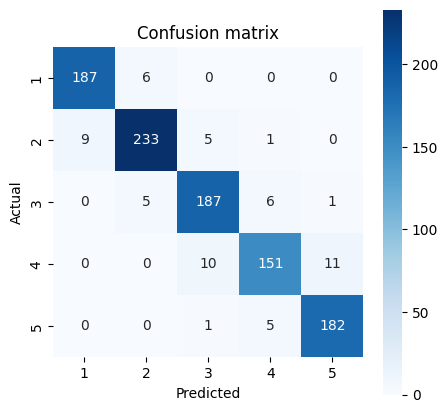

In [57]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the sentiments and completions to numpy arrays
sentiments = np.array(sentiments)
completions = np.array(completions)

# Evaluate performance
print("Classification report:")
print(classification_report(completions, sentiments))

cm = confusion_matrix(completions, sentiments, labels = [1,2,3,4,5])

# Plot the confusion matrix as a heat map
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", square=True,xticklabels=[1, 2, 3, 4, 5], yticklabels=[1, 2, 3, 4 ,5])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion matrix")
plt.show()